In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
path = "/home/jherfson/Dropbox/Research_Jherfson/Estabilidade termodinâmica e diagramas de fase teóricos/impedancia/python/result.txt"
frequency = np.loadtxt(path, delimiter=" ", usecols=(0))
z_real_txt = np.loadtxt(path, delimiter=" ", usecols=(1))
z_image_txt = np.loadtxt(path, delimiter=" ", usecols=(2))


In [17]:
alpha = 0.01
c = 0.1
r = 0.1

In [18]:
def angular_frequency(frequency):
    return 2 * np.pi * frequency

In [83]:
def y_hat(c, r):
    z_real = r * (1+ (angular_frequency(frequency) * c * r)**2)**-1 
    z_image = - (angular_frequency(frequency) * r**2 * c * (1 + (angular_frequency(frequency) * r * c)**2)**-1)
    #plt.plot(z_real,z_image, "bo")
    #plt.savefig("figura.png", dpi=1200)
    z = z_real + z_image

    return z

In [84]:
y_hat(c, r)

array([ 9.33482904e-02,  9.24904580e-02,  9.15172901e-02,  9.04125690e-02,
        8.91577109e-02,  8.77314816e-02,  8.61100540e-02,  8.42664073e-02,
        8.21705221e-02,  7.97894968e-02,  7.70875113e-02,  7.40272663e-02,
        7.05706622e-02,  6.66815172e-02,  6.23286577e-02,  5.74899385e-02,
        5.21582815e-02,  4.63479862e-02,  4.01018554e-02,  3.34968341e-02,
        2.66479557e-02,  1.97069484e-02,  1.28554810e-02,  6.29159797e-03,
        2.10089419e-04, -5.21817012e-03, -9.86362060e-03, -1.36516638e-02,
       -1.65648569e-02, -1.86379003e-02, -1.99464333e-02, -2.05921304e-02,
       -2.06889940e-02, -2.03514646e-02, -1.96862243e-02, -1.87871785e-02,
       -1.77333639e-02, -1.65887656e-02, -1.54034577e-02, -1.42152721e-02,
       -1.30518573e-02, -1.19325395e-02, -1.08701296e-02, -9.87243750e-03,
       -8.94340970e-03, -8.08416814e-03, -7.29397274e-03, -6.57057930e-03,
       -5.91087678e-03, -5.31120923e-03, -4.76753860e-03, -4.27579138e-03,
       -3.83184544e-03, -

In [69]:
def plot_line(z_real_txt, z_image_txt, c, r):
    x_values = [i for i in range(int(min(z_real_txt)) - 1, int(max(z_real_txt)) + 2)]
    y_values_z_real = [y_hat(c, r)[0] for x in x_values]
    y_values_z_image = [y_hat(c, r)[1] for x in x_values]
    #plt.plot(x_values,y_values_z_real, 'r')
    plt.plot(x_values,y_values_z_image, 'r')
    plt.plot(z_real_txt, z_image_txt, 'bo')

In [87]:
def plot_line(z_real_txt, z_image_txt, c, r):
    x_values = [i for i in range(int(min(z_real_txt)) - 1, int(max(z_real_txt)) + 2)]
    y_values_z_real = [y_hat(c, r) for x in x_values]
    #y_values_z_image = [y_hat(c, r)[1] for x in x_values]
    #plt.plot(x_values,y_values_z_real, 'r')
    plt.plot(x_values,y_values_z_real, 'r')
    plt.plot(z_real_txt, z_image_txt, 'bo')

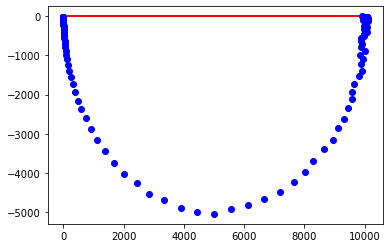

In [88]:
plot_line(z_real_txt, z_image_txt, c, r)

In [81]:
def MSE(z_real_txt, z_image_txt, c, r):
    custo_r = 0
    custo_i = 0
    m_r = float(len(z_real_txt))
    m_i = float(len(z_image_txt))
    for i in range(0, len(z_real_txt)):
        custo_r += (y_hat(c, r)[0] - z_image_txt[i])**2
        custo_i += (y_hat(c, r)[1] - z_image_txt[i])**2
    print("custo_r: ",custo_r)
    print("custo_i: ",custo_i)

        
    return custo_r/m_r, custo_i/m_i

In [106]:
def MSE(z_real_txt, z_image_txt, c, r):
    custo = 0
    m = float(len(z_real_txt))
    for i in range(0, len(z_real_txt)):
        custo += (y_hat(c, r) - z_image_txt[i])**2     
    print("custo: ",custo)

        
    return custo/m

In [107]:
MSE(z_real_txt, z_image_txt, c, r)

custo:  [4.33479491e+08 4.33479258e+08 4.33478992e+08 4.33478692e+08
 4.33478350e+08 4.33477961e+08 4.33477520e+08 4.33477017e+08
 4.33476446e+08 4.33475798e+08 4.33475062e+08 4.33474228e+08
 4.33473287e+08 4.33472227e+08 4.33471041e+08 4.33469723e+08
 4.33468271e+08 4.33466688e+08 4.33464987e+08 4.33463188e+08
 4.33461322e+08 4.33459432e+08 4.33457565e+08 4.33455777e+08
 4.33454121e+08 4.33452642e+08 4.33451377e+08 4.33450345e+08
 4.33449552e+08 4.33448987e+08 4.33448631e+08 4.33448455e+08
 4.33448428e+08 4.33448520e+08 4.33448702e+08 4.33448946e+08
 4.33449233e+08 4.33449545e+08 4.33449868e+08 4.33450192e+08
 4.33450509e+08 4.33450813e+08 4.33451103e+08 4.33451375e+08
 4.33451628e+08 4.33451862e+08 4.33452077e+08 4.33452274e+08
 4.33452454e+08 4.33452617e+08 4.33452765e+08 4.33452899e+08
 4.33453020e+08 4.33453129e+08 4.33453227e+08 4.33453315e+08
 4.33453394e+08 4.33453465e+08 4.33453529e+08 4.33453586e+08
 4.33453637e+08 4.33453683e+08 4.33453724e+08 4.33453760e+08
 4.33453793e+08 

array([3582475.13421487, 3582473.20298949, 3582471.01211271,
       3582468.52507458, 3582465.70003894, 3582462.48920282,
       3582458.83892622, 3582454.6883801 , 3582449.96998528,
       3582444.60967504, 3582438.52681323, 3582431.63743505,
       3582423.85577577, 3582415.10039013, 3582405.30110899,
       3582394.40809137, 3582382.40541683, 3582369.32529224,
       3582355.26409074, 3582340.3950453 , 3582324.97712716,
       3582309.35190796, 3582293.9283507 , 3582279.15227182,
       3582265.462152  , 3582253.24262735, 3582242.78532659,
       3582234.25815382, 3582227.70035463, 3582223.03380087,
       3582220.08821341, 3582218.63471132, 3582218.41666575,
       3582219.17646412, 3582220.67395943, 3582222.69776645,
       3582225.06996942, 3582227.64653459, 3582230.31474253,
       3582232.98943122, 3582235.60836189, 3582238.12802961,
       3582240.51959554, 3582242.76547906, 3582244.8567955 ,
       3582246.79101905, 3582248.56981529, 3582250.1982358 ,
       3582251.68328351,

In [47]:
def gradient_descent_step(c, r, z_real_txt , z_image_txt, alpha):
    
    erro_c = 0
    erro_r = 0
    m_r = float(len(z_real_txt))
    m_i = float(len(z_image_txt))
    
    for i in range(0,len(z_real_txt)):
        # Capacitor
        W=1
        numerador_c = (-2 * r**3 * angular_frequency(frequency[i])**2 * c)
        denominador = (1 + (angular_frequency(frequency[i]) * r * c)**2)**2 
        sc_1 = 2 * W * (y_hat(c, r)[0] - z_real_txt[i]) * numerador_c/denominador
        sc_2 = 2 * W * (y_hat(c, r)[1] - z_image_txt[i]) * (-angular_frequency(frequency[i]) * r**2*((-angular_frequency(frequency[i])* r * c)**2 + 1))/denominador
        
        # Resitor
        numerador_r = (-(angular_frequency(frequency[i]) * c * r)**2 + 1)
        sr_1 = 2 * W * (y_hat(c, r)[0] - z_real_txt[i]) * numerador_r/denominador
        sr_2 = 2 * W * (y_hat(c, r)[1] - z_image_txt[i]) * (-2 * angular_frequency(frequency[i]) * r * c)/denominador 


        erro_c += sc_1 + sc_2
        erro_r += sr_1 + sc_2
        
    new_c = c - alpha * (1/m_r) * erro_c
    new_r = r - alpha * (1/m) * erro_r

    return new_c, new_r

In [108]:
def gradient_descent_step(c, r, z_real_txt , z_image_txt, alpha):
    
    erro_c = 0
    erro_r = 0
    m = float(len(z_real_txt))

    
    for i in range(0,len(z_real_txt)):
        # Capacitor
        W=1
        numerador_c = (-2 * r**3 * angular_frequency(frequency[i])**2 * c)
        denominador = (1 + (angular_frequency(frequency[i]) * r * c)**2)**2 
        sc_1 = 2 * W * (y_hat(c, r) - z_real_txt[i]) * numerador_c/denominador
        sc_2 = 2 * W * (y_hat(c, r) - z_image_txt[i]) * (-angular_frequency(frequency[i]) * r**2*((-angular_frequency(frequency[i])* r * c)**2 + 1))/denominador
        
        # Resitor
        numerador_r = (-(angular_frequency(frequency[i]) * c * r)**2 + 1)
        sr_1 = 2 * W * (y_hat(c, r) - z_real_txt[i]) * numerador_r/denominador
        sr_2 = 2 * W * (y_hat(c, r) - z_image_txt[i]) * (-2 * angular_frequency(frequency[i]) * r * c)/denominador 


        erro_c += sc_1 + sc_2
        erro_r += sr_1 + sc_2
        
    new_c = c - alpha * (1/m) * erro_c
    new_r = r - alpha * (1/m) * erro_r

    return new_c, new_r

In [109]:
epoch = 70

In [110]:
def gradient_descent(c, r, z_real_txt, z_image_txt, alpha, epoch):
    custo = np.zeros(epoch)
    for i in range(epoch):
        c , r = gradient_descent_step(c, r, z_real_txt, z_image_txt, alpha)
        custo[i] = MSE(z_real_txt, z_image_txt, c, r)
        
    return c, r, custo

In [111]:
c, r, custo = gradient_descent(c, r, z_real_txt, z_image_txt, alpha, epoch)

custo:  [4.33457260e+08 4.33456912e+08 4.33456603e+08 4.33456326e+08
 4.33456080e+08 4.33455861e+08 4.33455665e+08 4.33455491e+08
 4.33455336e+08 4.33455198e+08 4.33455074e+08 4.33454964e+08
 4.33454866e+08 4.33454779e+08 4.33454701e+08 4.33454632e+08
 4.33454570e+08 4.33454515e+08 4.33454466e+08 4.33454422e+08
 4.33454383e+08 4.33454348e+08 4.33454317e+08 4.33454290e+08
 4.33454265e+08 4.33454243e+08 4.33454224e+08 4.33454206e+08
 4.33454191e+08 4.33454177e+08 4.33454165e+08 4.33454154e+08
 4.33454144e+08 4.33454135e+08 4.33454127e+08 4.33454121e+08
 4.33454114e+08 4.33454109e+08 4.33454104e+08 4.33454100e+08
 4.33454096e+08 4.33454092e+08 4.33454089e+08 4.33454086e+08
 4.33454084e+08 4.33454082e+08 4.33454080e+08 4.33454078e+08
 4.33454076e+08 4.33454075e+08 4.33454074e+08 4.33454073e+08
 4.33454072e+08 4.33454071e+08 4.33454070e+08 4.33454069e+08
 4.33454069e+08 4.33454068e+08 4.33454068e+08 4.33454067e+08
 4.33454067e+08 4.33454067e+08 4.33454066e+08 4.33454066e+08
 4.33454066e+08 

ValueError: setting an array element with a sequence.

In [97]:
print("c={}, r={}".format(c,r))

c=0.1, r=0.1
